In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd
import sys
sys.path.append('/home/yat-lok/workspace/tvbtools/')
from tools.signaltools import SignalToolkit
import ipywidgets as widgets
my_layout = widgets.Layout()
import typing
from typing import List
import seaborn as sns

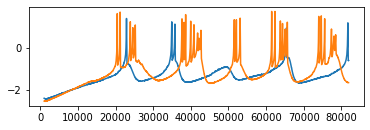

In [2]:
# read data
filename = '/mnt/d/data/LFP/SNC/2820A/2820A_0.014.csv'
df = pd.read_csv(filename)
df_left = df.iloc[1024:,5]
df_right = df.iloc[1024:,6]
# # visualize results
fig = plt.figure()
axes = fig.add_subplot(211)
axes.plot(df_left)
axes.plot(df_right)
plt.show()


In [3]:
df_left_low = SignalToolkit.sos_filter(df_left, [2,8], 81920)
df_left_high = SignalToolkit.sos_filter(df_left, [20,45], 81920)
df_right_low = SignalToolkit.sos_filter(df_right, [2,8], 81920)
df_right_high = SignalToolkit.sos_filter(df_right, [20,45], 81920)

0.045129869951880626


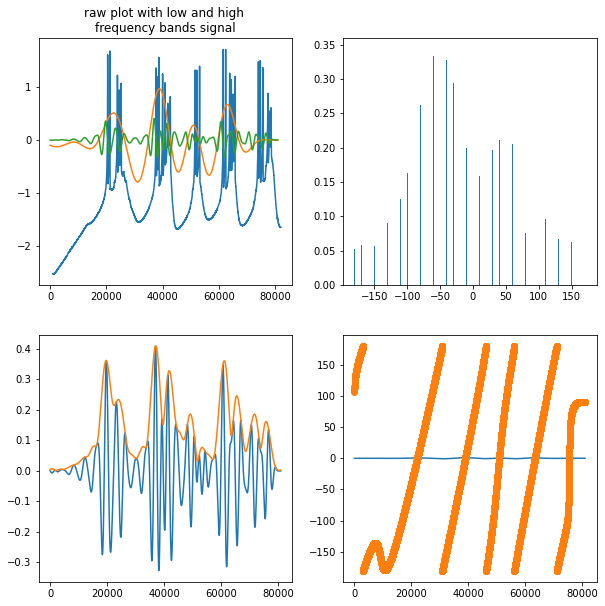

In [4]:
# %matplotlib widget
# hilbert transform
# step 1, get the amplitude envelop of high freq
akey = "df_right"
if akey == "df_left":
    key = df_left
    key_high = df_left_high
    key_low = df_left_low
else:
    key = df_right
    key_high = df_right_high
    key_low = df_right_low

h1=signal.hilbert(key_high)
amplitude_envelope = np.abs(h1)

# step 2, get the phase information of low freq
l1 = signal.hilbert(key_low)
phase_y1=np.degrees(np.angle(l1))

# step 3 bin the phase
bins = 36
cycle = 360/bins
stamp = np.arange(-180, 180, cycle)
phase_amp = np.zeros(len(stamp)) 
for ind, i in enumerate(stamp):
    phase_range = np.logical_and(phase_y1 >= i,
                                        phase_y1 < (i + cycle))
    amp_value = amplitude_envelope[phase_range]
    phase_amp[ind] = np.mean(amp_value)
# step 4, entropy method H
p_j = [p_j_single/np.sum(phase_amp) for p_j_single in phase_amp]
cap_H = -np.sum(p_j * np.log(p_j))

# step 5, calculate the MI
MI = (np.log(len(stamp))-cap_H) / np.log(len(stamp))
print(MI)

fig = plt.figure(figsize=(10,10))
axes = fig.add_subplot(222)
axes.bar(stamp, phase_amp)
# graph 2
axes2 = fig.add_subplot(221)
axes2.set_title("raw plot with low and high \nfrequency bands signal")
axes2.plot(key)
axes2.plot(key_low)
axes2.plot(key_high)

axes3 = fig.add_subplot(223)
axes3.plot(key_high)
axes3.plot(amplitude_envelope)

axes4 = fig.add_subplot(224)
axes4.plot(key_low)
axes4.plot(phase_y1, "o")
plt.show()

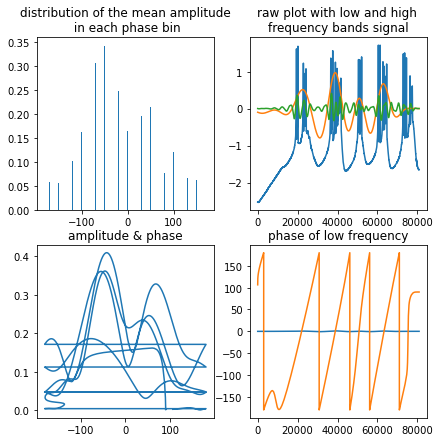

0.04512986995188053


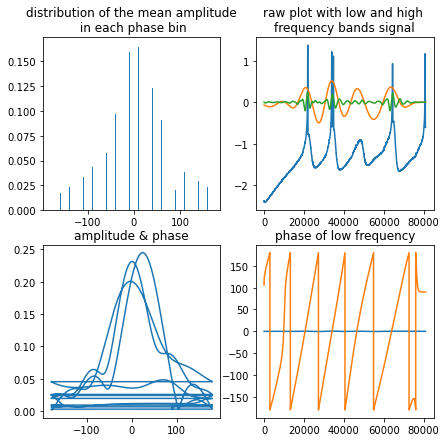

0.07194263227840697


In [5]:
print(SignalToolkit.PAC(df_right, [2,8], [20,45], fs=81920))
print(SignalToolkit.PAC(df_left, [2,8], [20,45], fs=81920))
SignalToolkit.PAC_comodulogram(df_right, [2,20,1],[20, 200, 1], fs=81920)
SignalToolkit.PAC_comodulogram(df_left, [2,20,1],[20, 200, 1], fs=81920)